In [ ]:
# The goal of this notebook is to understand how the  trajectory data is meant to be stored and processed 

from  vima.trajectory.trajectory_util import load_trajectory_info
import matplotlib.pyplot as plt 
import numpy as np

In [6]:
from glob import glob 

trajectories = glob("/scratch/rlcorrea/vima_v6/rearrange_then_restore/*") 

# WHAT ARE THE TRAJECTORIES 

The authors of VIMA PROVIDED an oracle that is able to run all the possible tasks in the vima bench challenge. It is able to generate new permutations of the task by changing the color of objects, the orientation, initial placement etc. 

Each unique trajectory is a unique run of a task. For example. A task could be "Rearange the  2 blocks present in the image" 

We will have obs which is the rgb images representing the scenes taken 
action.pkl represets the actions taken by the model at each tiemstep 
trajectory.pkl contains useful metadata such as the  total number of steps to complete task, prompt assests and others.  

We will now go over all of these. 
Bellow is what the file structure of 1 trajectory looks like

In [14]:
len(trajectories)

50079

In [15]:
trajectories[0]

'/scratch/rlcorrea/vima_v6/rearrange_then_restore/015059'

In [16]:
glob(trajectories[0]+'/*')

['/scratch/rlcorrea/vima_v6/rearrange_then_restore/015059/obs.pkl',
 '/scratch/rlcorrea/vima_v6/rearrange_then_restore/015059/rgb_top',
 '/scratch/rlcorrea/vima_v6/rearrange_then_restore/015059/action.pkl',
 '/scratch/rlcorrea/vima_v6/rearrange_then_restore/015059/trajectory.pkl',
 '/scratch/rlcorrea/vima_v6/rearrange_then_restore/015059/rgb_front']

In [19]:
#helper function to load the scene data 
traj = load_trajectory_info(trajectories[0])

In [22]:
traj.keys()

dict_keys(['prompt', 'prompt_assets', 'traj_meta', 'action', 'obs'])

In [23]:
traj['prompt']

'Rearrange objects to this setup {scene} and then restore.'

In [27]:
traj['prompt_assets']['scene'].keys()

dict_keys(['rgb', 'segm', 'placeholder_type'])

In [48]:
top_rgb_scene = traj['prompt_assets']['scene']['rgb']['top'] 
front_rgb_scene = traj['prompt_assets']['scene']['rgb']['front'] 


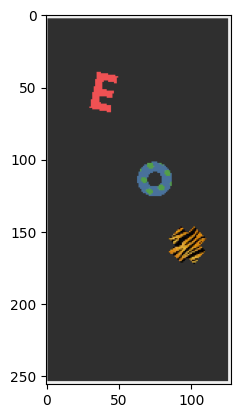

In [ ]:
plt.subplot(1,2,1)
plt.imshow(top_rgb_scene.transpose(2,1,0))
plt.imshow(front_rgb_scene.transpose(2,1,0))

In [ ]:
rgb_scene.reshape()